# GISAID Metadata - General Insights

In [98]:
import dask.dataframe as dd
import pandas as pd

gisaid_metadata = dd.read_csv('../../data/gisaid_metadata_preprocessed.csv')
gisaid_metadata = gisaid_metadata.compute()
gisaid_metadata.info()  # -> 23 columns: 17x string, 3x bool, 2x float & 1x integer

c:\users\ninai\onedrive\dokumente\studium\module\master\4. semester\accountability in ai\sampling bias\sampling-bias-cov19\venv\lib\site-packages\dask\dataframe\io\csv.py:136: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  path_info,


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8046806 entries, 0 to 50889
Data columns (total 23 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   covv_accession_id          object 
 1   covv_clade                 object 
 2   covv_collection_date       object 
 3   covsurver_prot_mutations   object 
 4   covsurver_uniquemutlist    object 
 5   covv_orig_lab              object 
 6   covv_passage               object 
 7   covv_subm_lab              object 
 8   gc_content                 float64
 9   covv_host                  object 
 10  is_high_coverage           bool   
 11  is_reference               bool   
 12  is_complete                bool   
 13  covv_lineage               object 
 14  pangolin_lineages_version  object 
 15  covv_location              object 
 16  n_content                  float64
 17  sequence_length            int64  
 18  covv_subm_date             object 
 19  covv_type                  object 
 20  covv

In [ ]:
import os

if not os.path.isdir('../../plots/GISAID'):
    os.mkdir('../../plots/GISAID')

## Overview of Available Features

In [99]:
# Get statistics of categorical columns
gisaid_metadata.describe(include=['object', 'bool'])

,covv_accession_id,covv_clade,covv_collection_date,covsurver_prot_mutations,covsurver_uniquemutlist,covv_orig_lab,covv_passage,covv_subm_lab,covv_host,is_high_coverage,is_reference,is_complete,covv_lineage,pangolin_lineages_version,covv_location,covv_subm_date,covv_type,covv_variant,country,variant_WHO_label
count,8046806,8046036,8046806,8046806,1730677,8046734,8046806,8046805,8046806,8046806,8046806,8046806,8046036,8046723,8046806,8046806,8046787,6806946,8046806,8046806
unique,8046806,11,904,3646351,164600,22755,348,4618,1,2,2,2,1588,1,27917,753,1,14,210,15
top,EPI_ISL_4087268,GK,2021,"(Spike_Q493R,Spike_N211del,Spike_V70del,NSP12_...","(NS7a_V82A,N_D63G)",Lighthouse Lab in Milton Keynes,Original,Wellcome Sanger Institute for the COVID-19 Gen...,Human,True,False,True,B.1.1.7,2022-02-02,Europe / United Kingdom / England,2021-11-17,betacoronavirus,VOC Delta GK (B.1.617.2+AY.*) first detected i...,USA,Delta
freq,1,4037221,66854,46923,407345,448854,7996222,1418208,8046806,5020771,8046805,7929479,1121206,8046723,1643702,68513,8046787,4173715,2582489,4173715


In [100]:
# Get statistics of numeric columns
gisaid_metadata.describe(include=['float64', 'int64'])

,gc_content,n_content,sequence_length
count,8.046806e+06,8.046806e+06,8.046806e+06
mean,3.794607e-01,1.445653e-02,2.944277e+04
std,2.013866e-03,3.758662e-02,2.930530e+03
min,2.941176e-02,0.000000e+00,3.400000e+01
25%,3.794019e-01,0.000000e+00,2.975200e+04
50%,3.796023e-01,7.402174e-04,2.976900e+04
75%,3.798132e-01,1.311904e-02,2.981300e+04
max,5.357143e-01,9.977176e-01,5.974600e+04


In [101]:
# Get value counts of 14 virus variants
gisaid_metadata['covv_variant'].value_counts()

# -> VOI = Variant of Interest
# -> VOC = Variant of Concern (Alpha, Beta, Gamma, Delta, Omicron)
# -> VUM = Variant under Monitoring (virus variants, have no WHO label)

VOC Delta GK (B.1.617.2+AY.*) first detected in India                                 4173715
VOC Omicron GRA (B.1.1.529+BA.*) first detected in Botswana/Hong Kong/South Africa    1157449
VOC Alpha GRY (B.1.1.7+Q.*) first detected in the UK                                  1150990
VOC Gamma GR/501Y.V3 (P.1+P.1.*) first detected in Brazil/Japan                        120350
VOI Epsilon GH/452R.V1 (B.1.429+B.1.427) first detected in USA/California               70339
VOI Iota GH/253G.V1 (B.1.526) first detected in USA/New York                            43100
VOC Beta GH/501Y.V2 (B.1.351+B.1.351.2+B.1.351.3) first detected in South Africa        41607
VOI Mu GH (B.1.621+B.1.621.1) first detected in Colombia                                15459
VOI Lambda GR/452Q.V1 (C.37+C.37.1) first detected in Peru                               9768
VOI Eta G/484K.V3 (B.1.525) first detected in UK/Nigeria                                 9493
VOI Kappa G/452R.V3 (B.1.617.1) first detected in India     

In [102]:
gisaid_metadata['country'].value_counts()

USA                2582489
United Kingdom     2008235
Germany             392655
Denmark             349869
Canada              268424
                    ...   
Solomon Islands          6
Sint Eustatius           4
Tanzania                 3
Vanuatu                  2
Palau                    2
Name: country, Length: 210, dtype: int64

## Amount of Data over Time

In [148]:
# Show which time frame is covered
gisaid_metadata['covv_subm_date'] = pd.to_datetime(gisaid_metadata['covv_subm_date'])
print(f'Includes data from {str(gisaid_metadata["covv_subm_date"].min().date())} to {str(gisaid_metadata["covv_subm_date"].max().date())}')

Includes data from 2020-01-10 to 2022-02-10


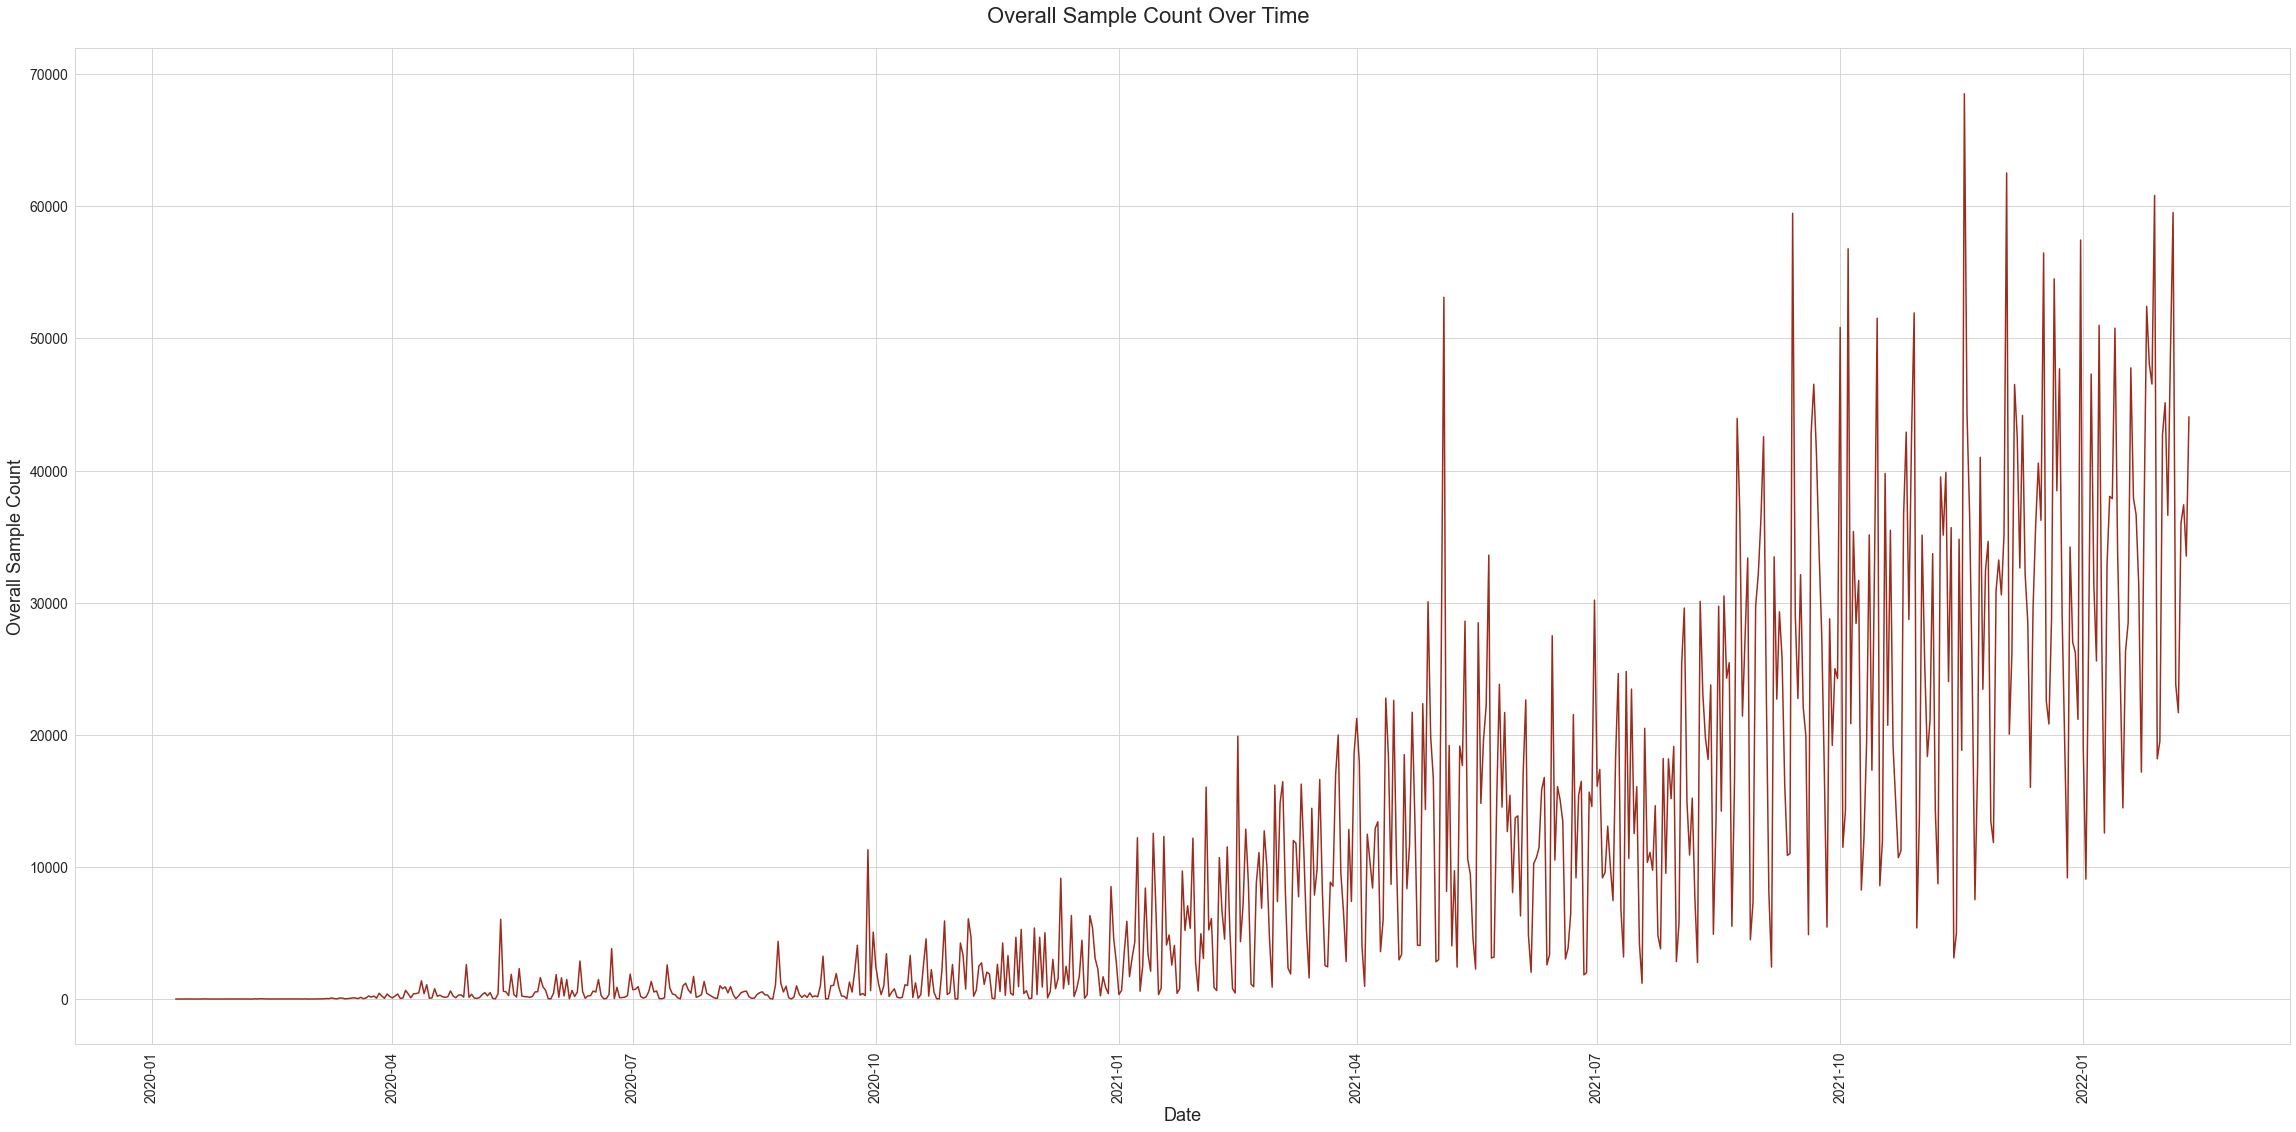

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create line plot with overall sample count over time
plotdata = gisaid_metadata.groupby(['covv_subm_date']).size().reset_index().rename(columns={0 : 'count'})

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(32, 16))
sns.lineplot(data=plotdata,
             x='covv_subm_date',
             y='count',
             color='#9B2D1F')

fig.suptitle('Overall Sample Count Over Time\n', fontsize=22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Overall Sample Count', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.savefig('../../plots/GISAID/overall_sample_count_over_time.png', dpi=300)
plt.close()

## Number of Samples Scaled by Number of Inhabitants per Country

Bar plot with sample count per country scaled by #inhabitants.

In [140]:
plotdata = gisaid_metadata.copy(deep=True)

In [141]:
import json

with open('../helper_dicts/country_inhabitants.json') as f:
    country_inhabitants_map = json.load(f)

# Reduce 210 countries to 102 countries also known in map
plotdata = plotdata[plotdata['country'].isin(list(country_inhabitants_map.keys()))]
plotdata['country'].nunique()

102

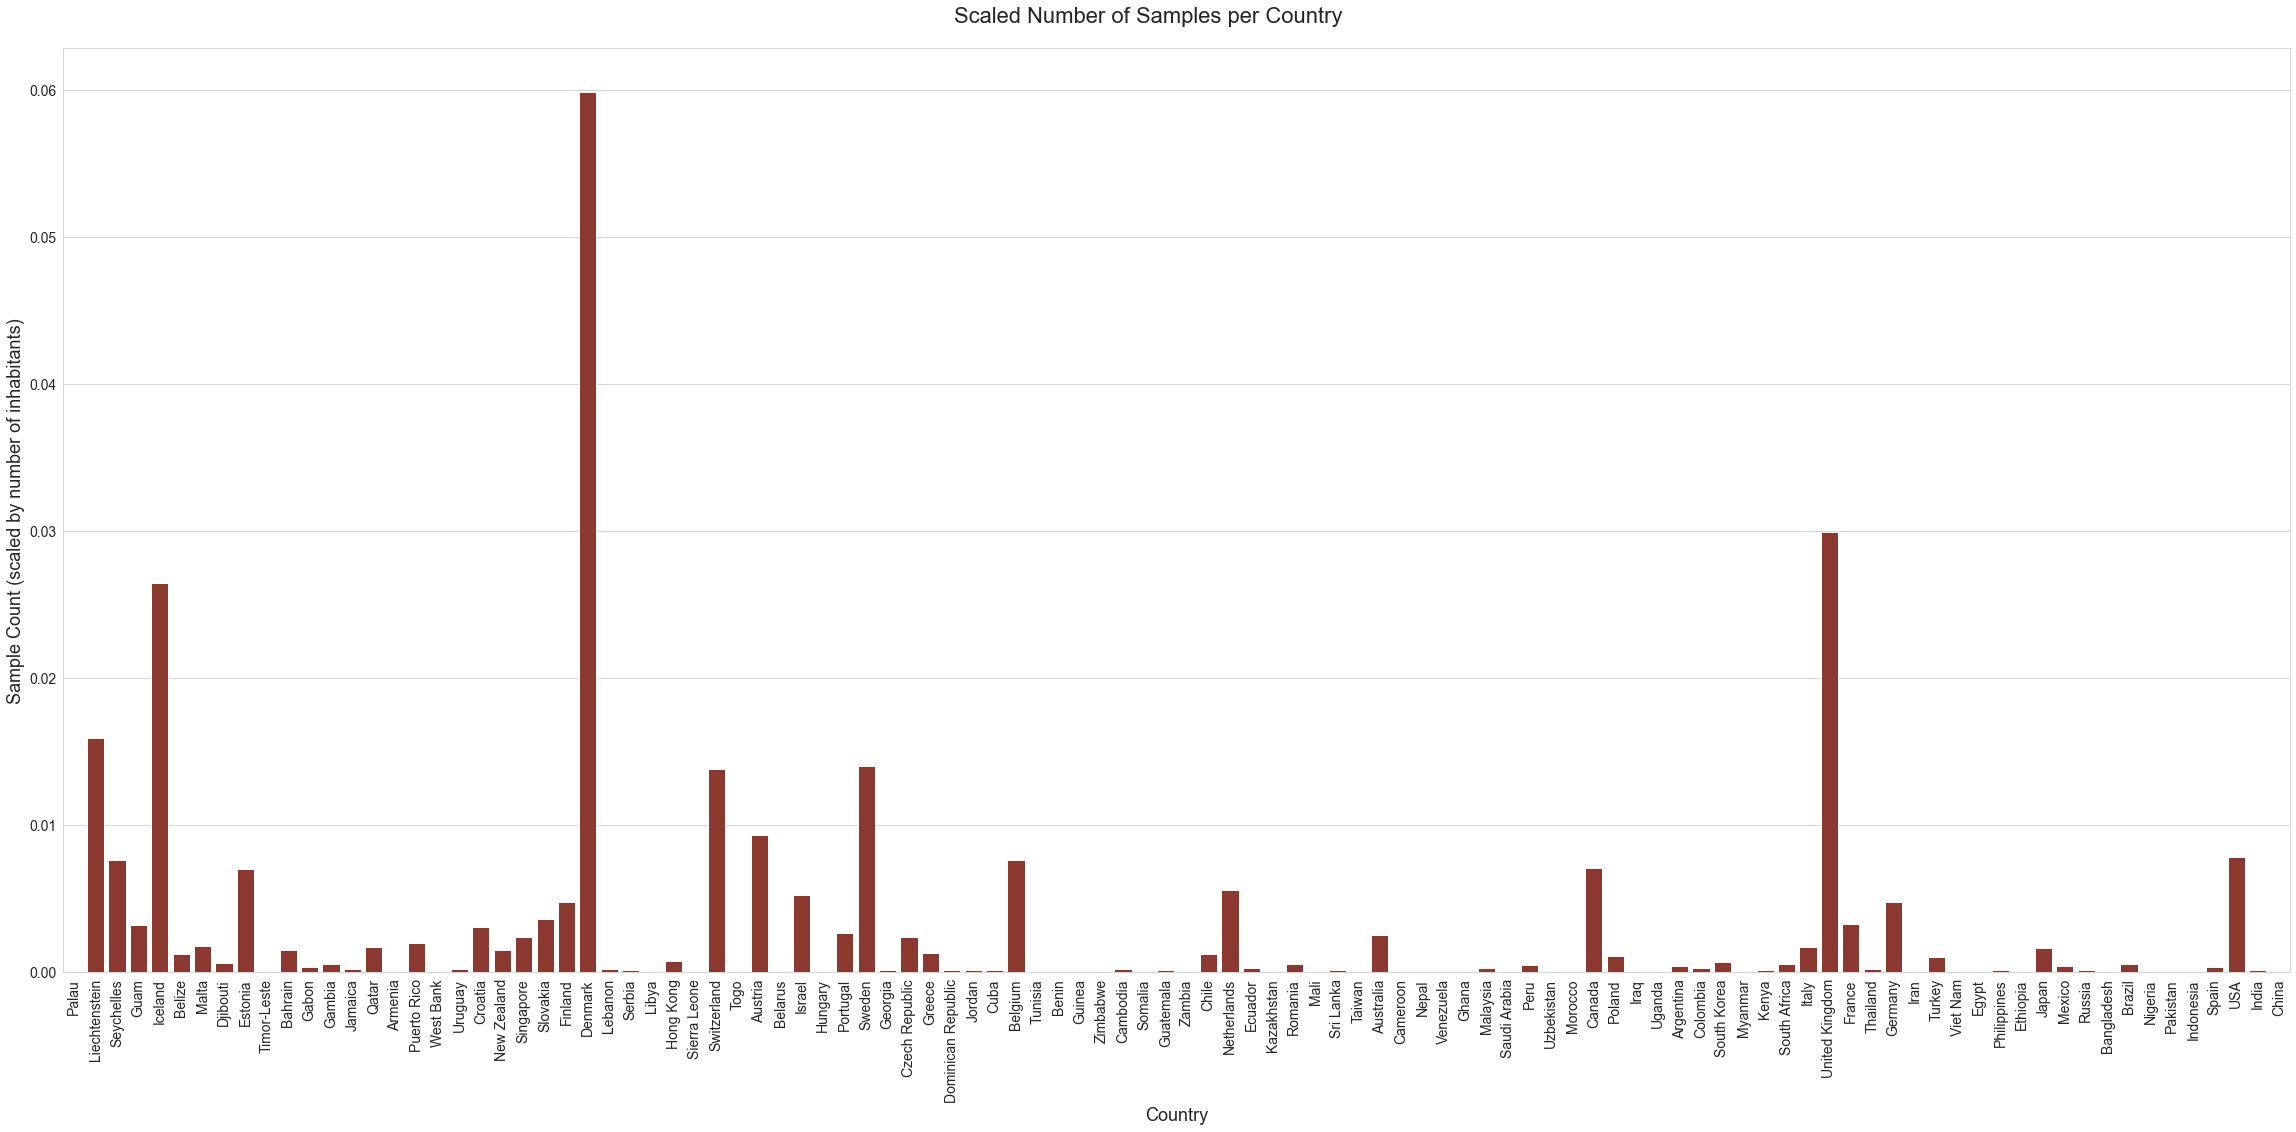

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort map by number of inhabitants + avoid plotting bar for "unknown" entry
country_inhabitants_map_sorted = list(country_inhabitants_map.items())
country_inhabitants_map_sorted.sort(key=lambda pair: pair[1])
country_inhabitants_map_sorted.remove(('Unknown', 0))

# Only take countries with at least 500 samples
plotdata_reduced = plotdata[plotdata['country'].map(plotdata['country'].value_counts()) >= 500]

# Create barplot with sample count per country
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(32, 16))
sns.countplot(data=plotdata_reduced,
              x='country',
              color='#9B2D1F',  # set custom red
              order=list(zip(*country_inhabitants_map_sorted))[0])  # get sorted countries

fig.suptitle('Scaled Number of Samples per Country\n', fontsize=22)
plt.xlabel('Country', fontsize=18)
plt.ylabel('Sample Count (scaled by number of inhabitants)', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

# Scale height of bars with number of inhabitants per country
max_y = 0
for i, bar in enumerate(ax.patches):
    country = ax.get_xticklabels()[i].get_text()
    new_height = bar.get_height() / country_inhabitants_map[country]
    bar.set_height(new_height)

    max_y = max(max_y, new_height)
plt.gca().set_ylim([0, max_y + (max_y / 20)])

plt.tight_layout()
plt.savefig('../../plots/GISAID/country_counts_scaled_by_nr_inhabitants.png', dpi=300)
plt.close()

## Number of Samples Scaled by Number of Inhabitants for Selected Countries over Time

Line plot showing monthly number of samples divided by number of inhabitants for each selected country as single line.

In [110]:
import json

with open('../helper_dicts/country_inhabitants.json') as f:
    country_inhabitants_map = json.load(f)

In [164]:
# Extract month
gisaid_metadata['month_year'] = pd.to_datetime(gisaid_metadata['covv_subm_date']).dt.to_period('M')

# Get sample count per country and month
plotdata = gisaid_metadata.groupby(['country', 'month_year']).size().reset_index().rename(columns={0 : 'count'})

# Reduce countries to countries known in inhabitants map
plotdata = plotdata[plotdata['country'].isin(list(country_inhabitants_map.keys()))]
plotdata

,country,month_year,count
53,Argentina,2020-04,29
54,Argentina,2020-06,8
55,Argentina,2020-07,1
56,Argentina,2020-11,12
57,Argentina,2021-01,611
...,...,...,...
2530,Zimbabwe,2021-06,160
2531,Zimbabwe,2021-08,98
2532,Zimbabwe,2021-11,51
2533,Zimbabwe,2022-01,219


In [165]:
# Scale count
def scale_count(row):
    return row['count'] / country_inhabitants_map[row['country']]

plotdata['count_scaled'] = plotdata.apply(lambda row: scale_count(row), axis=1)
plotdata

,country,month_year,count,count_scaled
53,Argentina,2020-04,29,6.358837e-07
54,Argentina,2020-06,8,1.754162e-07
55,Argentina,2020-07,1,2.192702e-08
56,Argentina,2020-11,12,2.631243e-07
57,Argentina,2021-01,611,1.339741e-05
...,...,...,...,...
2530,Zimbabwe,2021-06,160,1.060152e-05
2531,Zimbabwe,2021-08,98,6.493433e-06
2532,Zimbabwe,2021-11,51,3.379235e-06
2533,Zimbabwe,2022-01,219,1.451083e-05


In [168]:
# Set dtype
plotdata['month_year'] = plotdata['month_year'].astype('str')

# Set order
plotdata['month_year'] = pd.Categorical(plotdata['month_year'],
                                        categories=sorted(plotdata['month_year'].unique()),
                                        ordered=True)

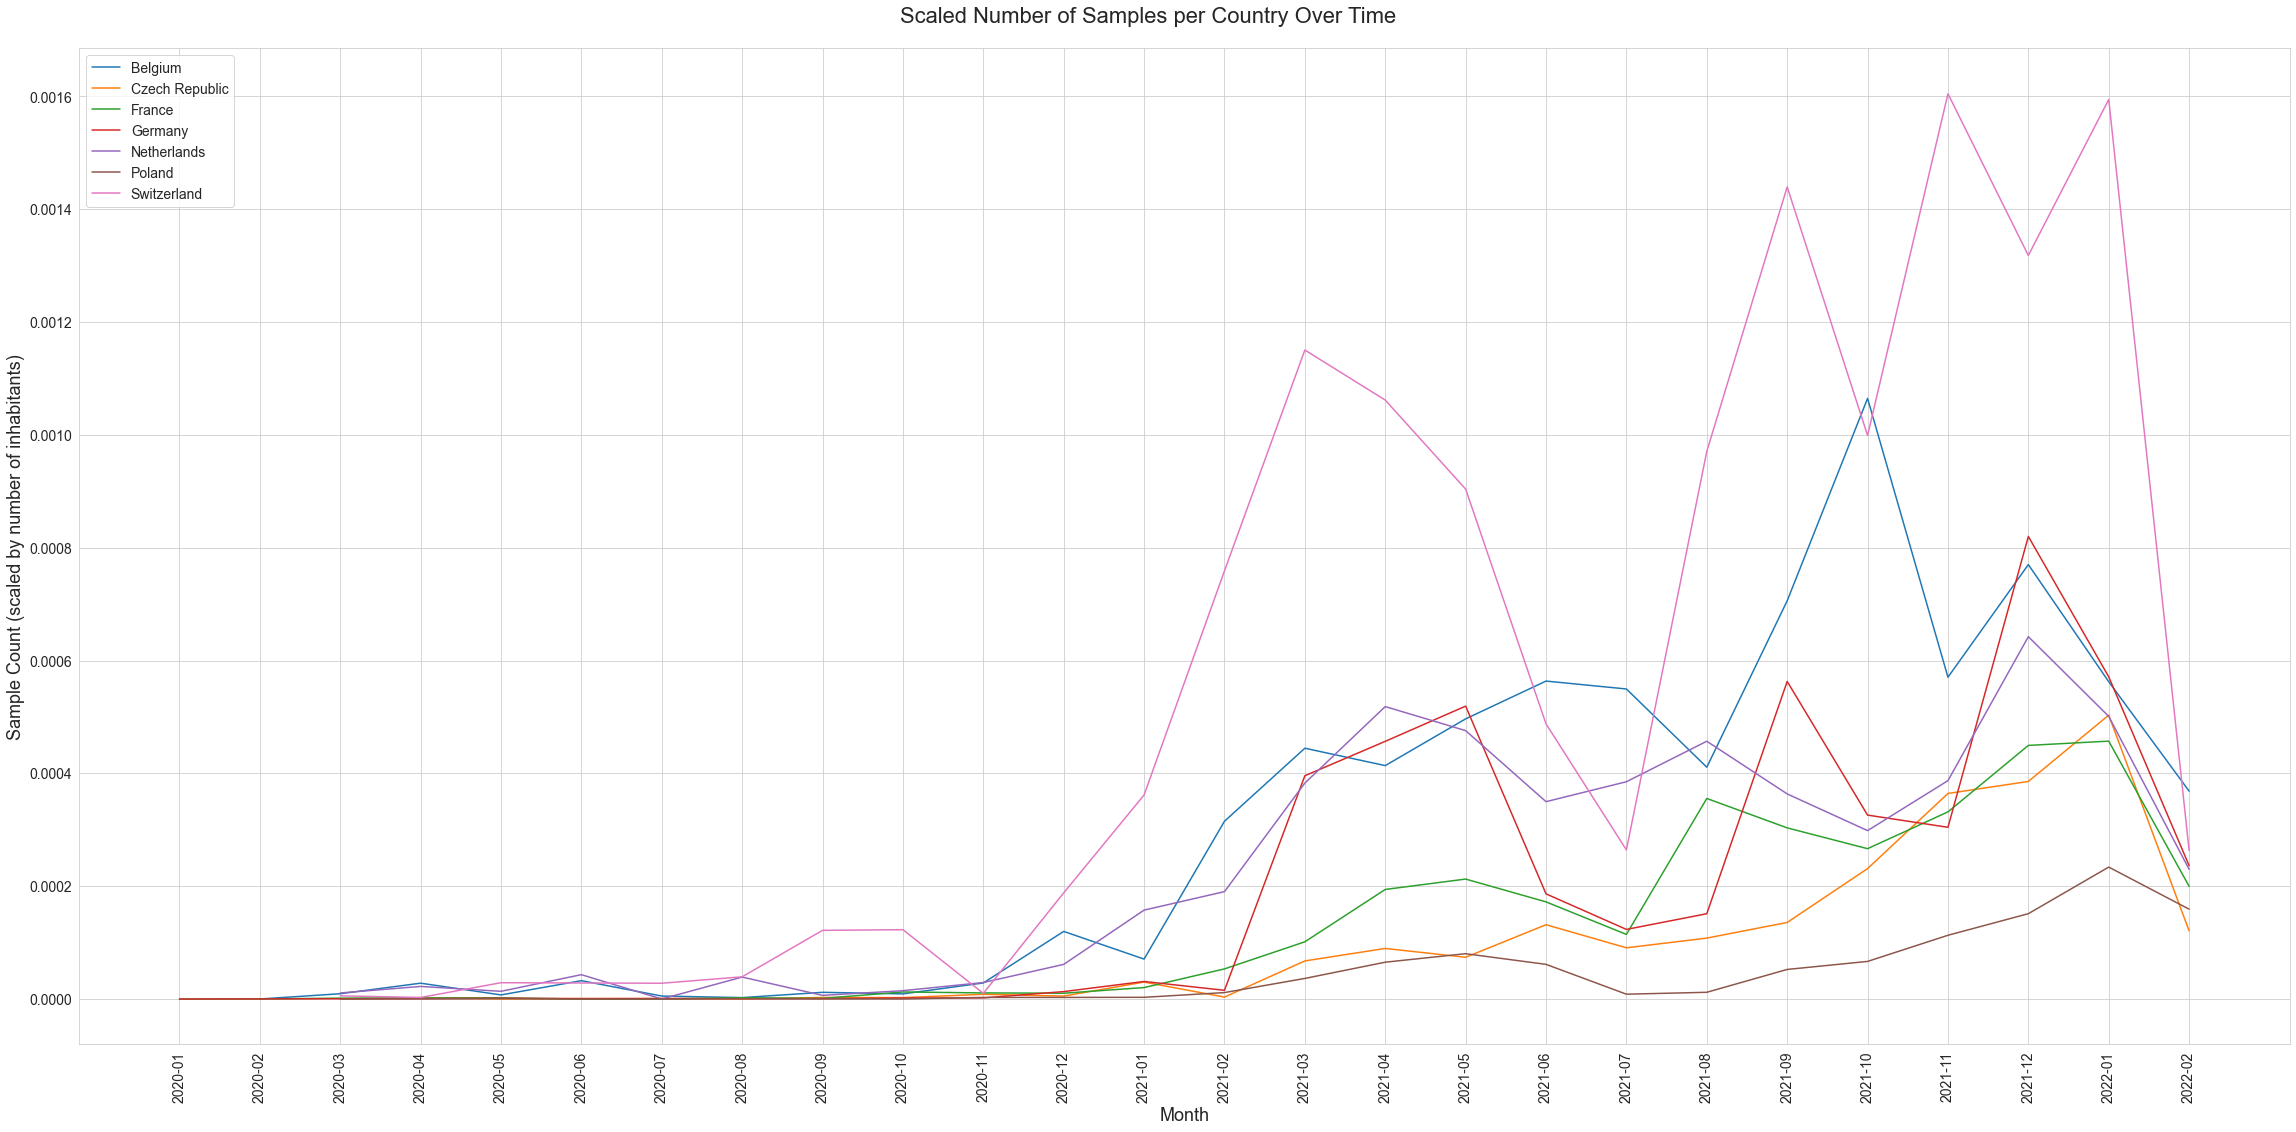

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust countries to show (currently neighbouring countries of Germany are selected)
# Denmark and Austria were excluded, as their values distort data of other countries too much
# Luxembourg is not available in GISAID data & json map
COUNTRIES = ['Germany', 'Poland', 'Czech Republic', 'Switzerland', 'France', 'Belgium', 'Netherlands']

plotdata_reduced = plotdata[plotdata['country'].isin(COUNTRIES)]

# Per country and month, create line with sample count scaled by number of inhabitants
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(32, 16))

sns.lineplot(data=plotdata_reduced,
             x='month_year',
             y='count_scaled',
             hue='country')

fig.suptitle('Scaled Number of Samples per Country Over Time\n', fontsize=22)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Sample Count (scaled by number of inhabitants)', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=14)

plt.tight_layout()
plt.savefig('../../plots/GISAID/country_counts_over_time_scaled_by_nr_inhabitants_LINE.png', dpi=300)
plt.close()

## Current Percentage of Virus Variants for Selected Country

Multi-bar plot with countries on x-axis, virus variants as hue and #variant/#samples on y-axis.

In [137]:
plotdata = gisaid_metadata.copy(deep=True)

In [138]:
# Prepare helper data for plots
country_counts = pd.DataFrame(plotdata['country'].value_counts().sort_index().reset_index())
country_counts.rename(columns={'index': 'country', 'country': 'count'}, inplace=True)
country_counts

,country,count
0,Afghanistan,99
1,Albania,43
2,Algeria,85
3,American Samoa,11
4,Andorra,88
...,...,...
205,Venezuela,294
206,Vietnam,2604
207,Wallis and Futuna Islands,10
208,Zambia,1142


c:\users\ninai\onedrive\dokumente\studium\module\master\4. semester\accountability in ai\sampling bias\sampling-bias-cov19\venv\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


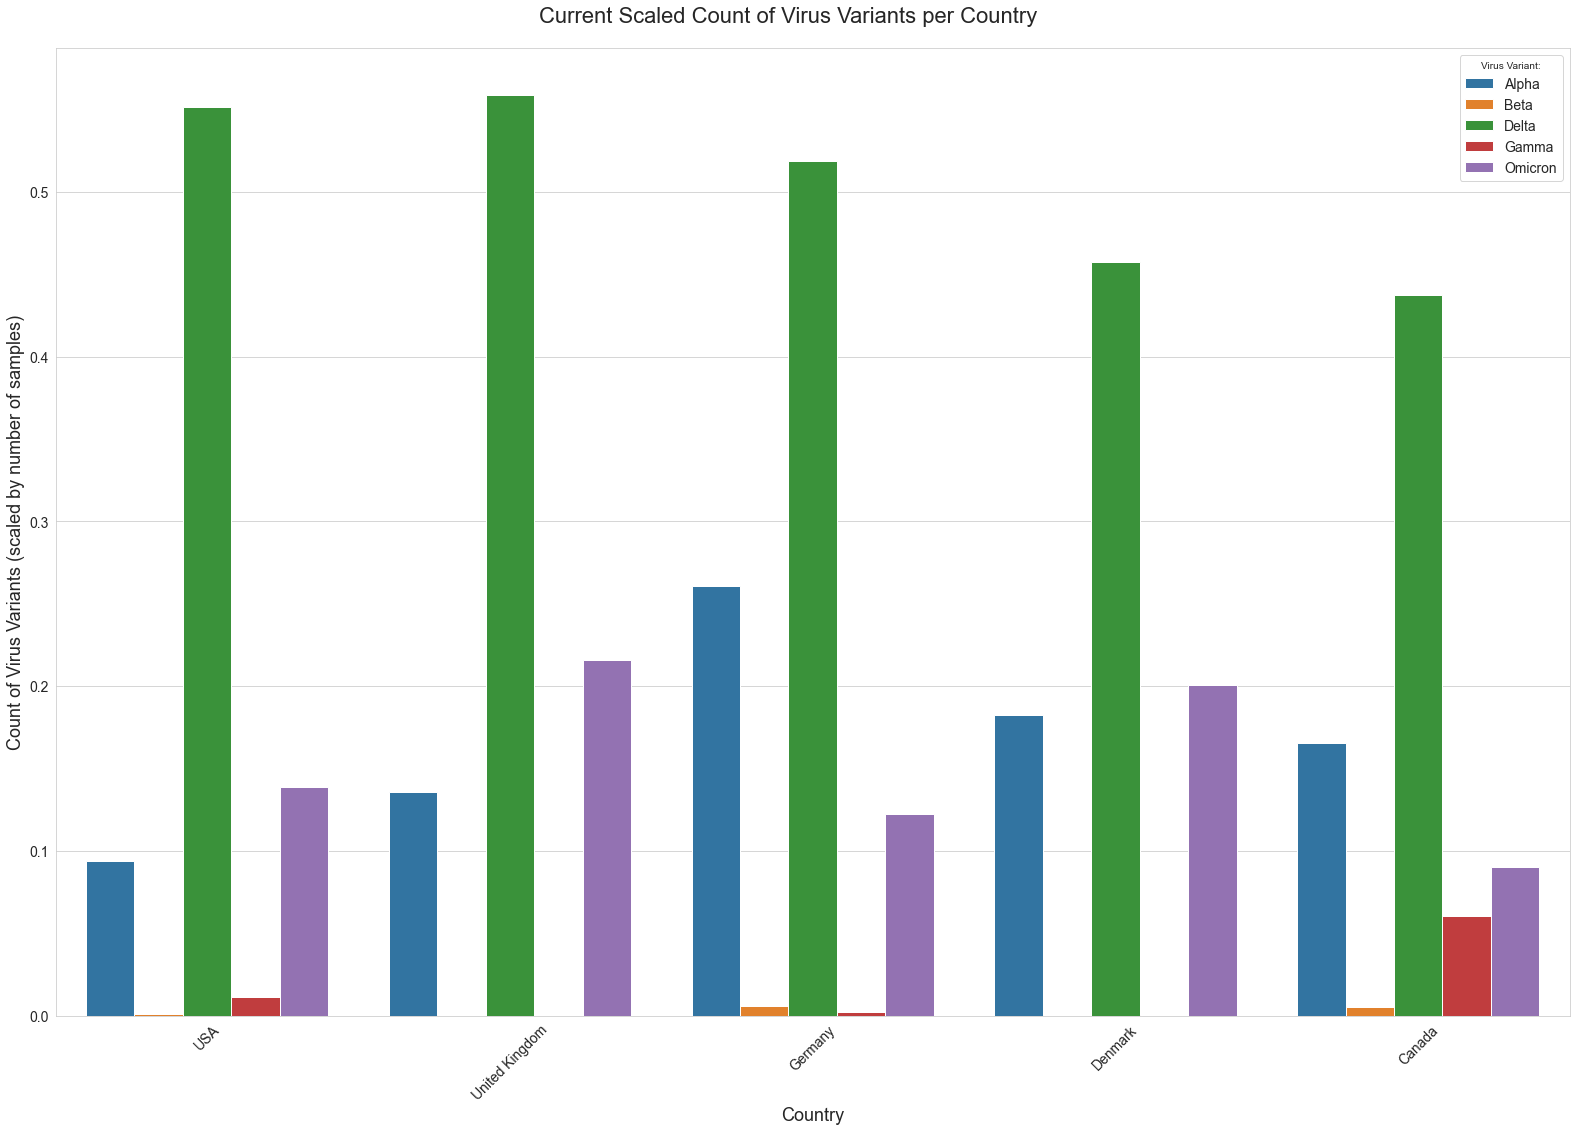

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust which countries and variants to include
COUNTRIES = ['USA', 'United Kingdom', 'Germany', 'Denmark', 'Canada']
VARIANT_TYPE = 'VOC'
VARIANTS = plotdata['variant_WHO_label'].unique()

plotdata_reduced = plotdata[plotdata['country'].isin(COUNTRIES)]
plotdata_reduced['covv_variant'] = plotdata_reduced['covv_variant'].astype(str)
plotdata_reduced = plotdata_reduced[(plotdata_reduced['covv_variant'].str.contains(VARIANT_TYPE)) & (plotdata_reduced['variant_WHO_label'].isin(VARIANTS))]

# Create multi-bar countplot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(22, 16))
sns.countplot(data=plotdata_reduced,
              x='country',
              hue='variant_WHO_label',
              hue_order=sorted(plotdata_reduced['variant_WHO_label'].unique()),
              order=COUNTRIES)

fig.suptitle('Current Scaled Count of Virus Variants per Country\n', fontsize=22)
plt.xlabel('Country', fontsize=18)
plt.ylabel('Count of Virus Variants (scaled by number of samples)', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', title='Virus Variant:', fontsize=14)
plt.rcParams['legend.title_fontsize'] = 14

# Scale height of bars with number of samples per country
max_y = 0
for i, bar in enumerate(ax.patches):
    country = ax.get_xticklabels()[i % len(COUNTRIES)].get_text()
    new_height = bar.get_height() / country_counts[country_counts['country'] == country]['count'].iloc[0]
    bar.set_height(new_height)

    max_y = max(max_y, new_height)
plt.gca().set_ylim([0, max_y + (max_y / 20)])

plt.tight_layout()
plt.savefig('../../plots/GISAID/virus_variant_counts_scaled_by_nr_sequences.png', dpi=300)
plt.close()

## Percentage of Virus Variants for Selected Countries Over Time

Multi-line time series plot with variant percentages (#variant/#samples) on y-axis, one line color per country and one marker per variant.

In [24]:
gisaid_metadata['covv_subm_date'] = pd.to_datetime(gisaid_metadata['covv_subm_date'])

In [37]:
country_date_counts = gisaid_metadata.groupby(['country', 'covv_subm_date']).size().reset_index()
country_date_counts.rename(columns={0 : 'samples'}, inplace=True)

country_variant_counts = gisaid_metadata.groupby(['country', 'covv_subm_date', 'variant_WHO_label']).size().reset_index()
country_variant_counts.rename(columns={0 : 'samples_per_variant'}, inplace=True)

plotdata = pd.merge(country_date_counts, country_variant_counts, on=['country', 'covv_subm_date'])
plotdata['relative_samples_per_variant'] = plotdata['samples_per_variant'] / plotdata['samples']
plotdata

# => SKIP TO PLOTTING CELL (= SKIP NEXT 6 CELLS) IF WEEKLY AGGREGATION IS NOT NEEDED

,country,covv_subm_date,samples,variant_WHO_label,samples_per_variant,relative_samples_per_variant
0,Afghanistan,2021-02-15,7,Unknown,7,1.000000
1,Afghanistan,2021-02-19,6,Unknown,6,1.000000
2,Afghanistan,2021-02-22,3,Unknown,3,1.000000
3,Afghanistan,2021-09-29,83,Alpha,55,0.662651
4,Afghanistan,2021-09-29,83,Delta,20,0.240964
...,...,...,...,...,...,...
32599,Zimbabwe,2021-11-27,4,Delta,3,0.750000
32600,Zimbabwe,2021-11-27,4,Unknown,1,0.250000
32601,Zimbabwe,2021-11-29,2,Delta,2,1.000000
32602,Zimbabwe,2022-01-11,165,Omicron,163,0.987879


In [38]:
from datetime import timedelta

start_date = gisaid_metadata['covv_subm_date'].min()
end_date = gisaid_metadata['covv_subm_date'].max()
delta = end_date - start_date

dates = [start_date + timedelta(days=i) for i in range(delta.days + 1)]

# Start on first Monday (first entry is Friday, thus remove first three entries)
dates = dates[3:]
dates

[Timestamp('2020-01-13 00:00:00'),
 Timestamp('2020-01-14 00:00:00'),
 Timestamp('2020-01-15 00:00:00'),
 Timestamp('2020-01-16 00:00:00'),
 Timestamp('2020-01-17 00:00:00'),
 Timestamp('2020-01-18 00:00:00'),
 Timestamp('2020-01-19 00:00:00'),
 Timestamp('2020-01-20 00:00:00'),
 Timestamp('2020-01-21 00:00:00'),
 Timestamp('2020-01-22 00:00:00'),
 Timestamp('2020-01-23 00:00:00'),
 Timestamp('2020-01-24 00:00:00'),
 Timestamp('2020-01-25 00:00:00'),
 Timestamp('2020-01-26 00:00:00'),
 Timestamp('2020-01-27 00:00:00'),
 Timestamp('2020-01-28 00:00:00'),
 Timestamp('2020-01-29 00:00:00'),
 Timestamp('2020-01-30 00:00:00'),
 Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-02-02 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-02-04 00:00:00'),
 Timestamp('2020-02-05 00:00:00'),
 Timestamp('2020-02-06 00:00:00'),
 Timestamp('2020-02-07 00:00:00'),
 Timestamp('2020-02-08 00:00:00'),
 Timestamp('2020-02-09 00:00:00'),
 Timestamp('2020-02-

In [39]:
# Get all Mondays (105 weeks)
week_starts = dates[::7]
week_starts

[Timestamp('2020-01-13 00:00:00'),
 Timestamp('2020-01-20 00:00:00'),
 Timestamp('2020-01-27 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-02-10 00:00:00'),
 Timestamp('2020-02-17 00:00:00'),
 Timestamp('2020-02-24 00:00:00'),
 Timestamp('2020-03-02 00:00:00'),
 Timestamp('2020-03-09 00:00:00'),
 Timestamp('2020-03-16 00:00:00'),
 Timestamp('2020-03-23 00:00:00'),
 Timestamp('2020-03-30 00:00:00'),
 Timestamp('2020-04-06 00:00:00'),
 Timestamp('2020-04-13 00:00:00'),
 Timestamp('2020-04-20 00:00:00'),
 Timestamp('2020-04-27 00:00:00'),
 Timestamp('2020-05-04 00:00:00'),
 Timestamp('2020-05-11 00:00:00'),
 Timestamp('2020-05-18 00:00:00'),
 Timestamp('2020-05-25 00:00:00'),
 Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-06-08 00:00:00'),
 Timestamp('2020-06-15 00:00:00'),
 Timestamp('2020-06-22 00:00:00'),
 Timestamp('2020-06-29 00:00:00'),
 Timestamp('2020-07-06 00:00:00'),
 Timestamp('2020-07-13 00:00:00'),
 Timestamp('2020-07-20 00:00:00'),
 Timestamp('2020-07-

In [40]:
# Map each Monday to all days belonging to same week
week_map = dict()
for i, week_start in enumerate(week_starts):
    week_map[week_start] = dates[(i*7) : (i*7) + 7]

week_map[week_starts[42]]

[Timestamp('2020-11-02 00:00:00'),
 Timestamp('2020-11-03 00:00:00'),
 Timestamp('2020-11-04 00:00:00'),
 Timestamp('2020-11-05 00:00:00'),
 Timestamp('2020-11-06 00:00:00'),
 Timestamp('2020-11-07 00:00:00'),
 Timestamp('2020-11-08 00:00:00')]

In [41]:
import itertools

country_variant_combis = list(itertools.product(plotdata['country'].unique(), plotdata['variant_WHO_label'].unique()))
country_variant_combis

[('Afghanistan', 'Unknown'),
 ('Afghanistan', 'Alpha'),
 ('Afghanistan', 'Delta'),
 ('Afghanistan', 'Iota'),
 ('Afghanistan', 'Eta'),
 ('Afghanistan', 'Omicron'),
 ('Afghanistan', 'Beta'),
 ('Afghanistan', 'Gamma'),
 ('Afghanistan', 'Kappa'),
 ('Afghanistan', 'Theta'),
 ('Afghanistan', 'Epsilon'),
 ('Afghanistan', 'Lambda'),
 ('Afghanistan', 'Zeta'),
 ('Afghanistan', 'Mu'),
 ('Afghanistan', 'B.1.640'),
 ('Albania', 'Unknown'),
 ('Albania', 'Alpha'),
 ('Albania', 'Delta'),
 ('Albania', 'Iota'),
 ('Albania', 'Eta'),
 ('Albania', 'Omicron'),
 ('Albania', 'Beta'),
 ('Albania', 'Gamma'),
 ('Albania', 'Kappa'),
 ('Albania', 'Theta'),
 ('Albania', 'Epsilon'),
 ('Albania', 'Lambda'),
 ('Albania', 'Zeta'),
 ('Albania', 'Mu'),
 ('Albania', 'B.1.640'),
 ('Algeria', 'Unknown'),
 ('Algeria', 'Alpha'),
 ('Algeria', 'Delta'),
 ('Algeria', 'Iota'),
 ('Algeria', 'Eta'),
 ('Algeria', 'Omicron'),
 ('Algeria', 'Beta'),
 ('Algeria', 'Gamma'),
 ('Algeria', 'Kappa'),
 ('Algeria', 'Theta'),
 ('Algeria', 'Epsi

In [42]:
# Create weekly plotdata holding summed relative sample count per week
weekly_plotdata = pd.DataFrame(columns=['country_variant', 'startday_of_week', 'relative_sample_count'])

# For each week, append all country-variant combinations
for week_start in week_starts:
    weekly_plotdata = weekly_plotdata.append(pd.DataFrame({'country_variant': country_variant_combis,
                                                           'startday_of_week': [week_start] * len(country_variant_combis)}))

weekly_plotdata

,country_variant,startday_of_week,relative_sample_count
0,"(Afghanistan, Unknown)",2020-01-13,NaN
1,"(Afghanistan, Alpha)",2020-01-13,NaN
2,"(Afghanistan, Delta)",2020-01-13,NaN
3,"(Afghanistan, Iota)",2020-01-13,NaN
4,"(Afghanistan, Eta)",2020-01-13,NaN
...,...,...,...
3085,"(Zimbabwe, Epsilon)",2022-01-10,NaN
3086,"(Zimbabwe, Lambda)",2022-01-10,NaN
3087,"(Zimbabwe, Zeta)",2022-01-10,NaN
3088,"(Zimbabwe, Mu)",2022-01-10,NaN


In [ ]:
def add_weekly_relative_sample_count(row):
    data = plotdata[(plotdata['country'] == row['country_variant'][0]) & (plotdata['variant_WHO_label'] == row['country_variant'][1])]
    week_data = data[data['covv_subm_date'].isin(week_map[row['startday_of_week']])]
    return week_data['relative_samples_per_variant'].sum()

# Add summed relative sample count per country-variant combination and week
weekly_plotdata['relative_sample_count'] = weekly_plotdata.apply(lambda row: add_weekly_relative_sample_count(row), axis=1)
weekly_plotdata

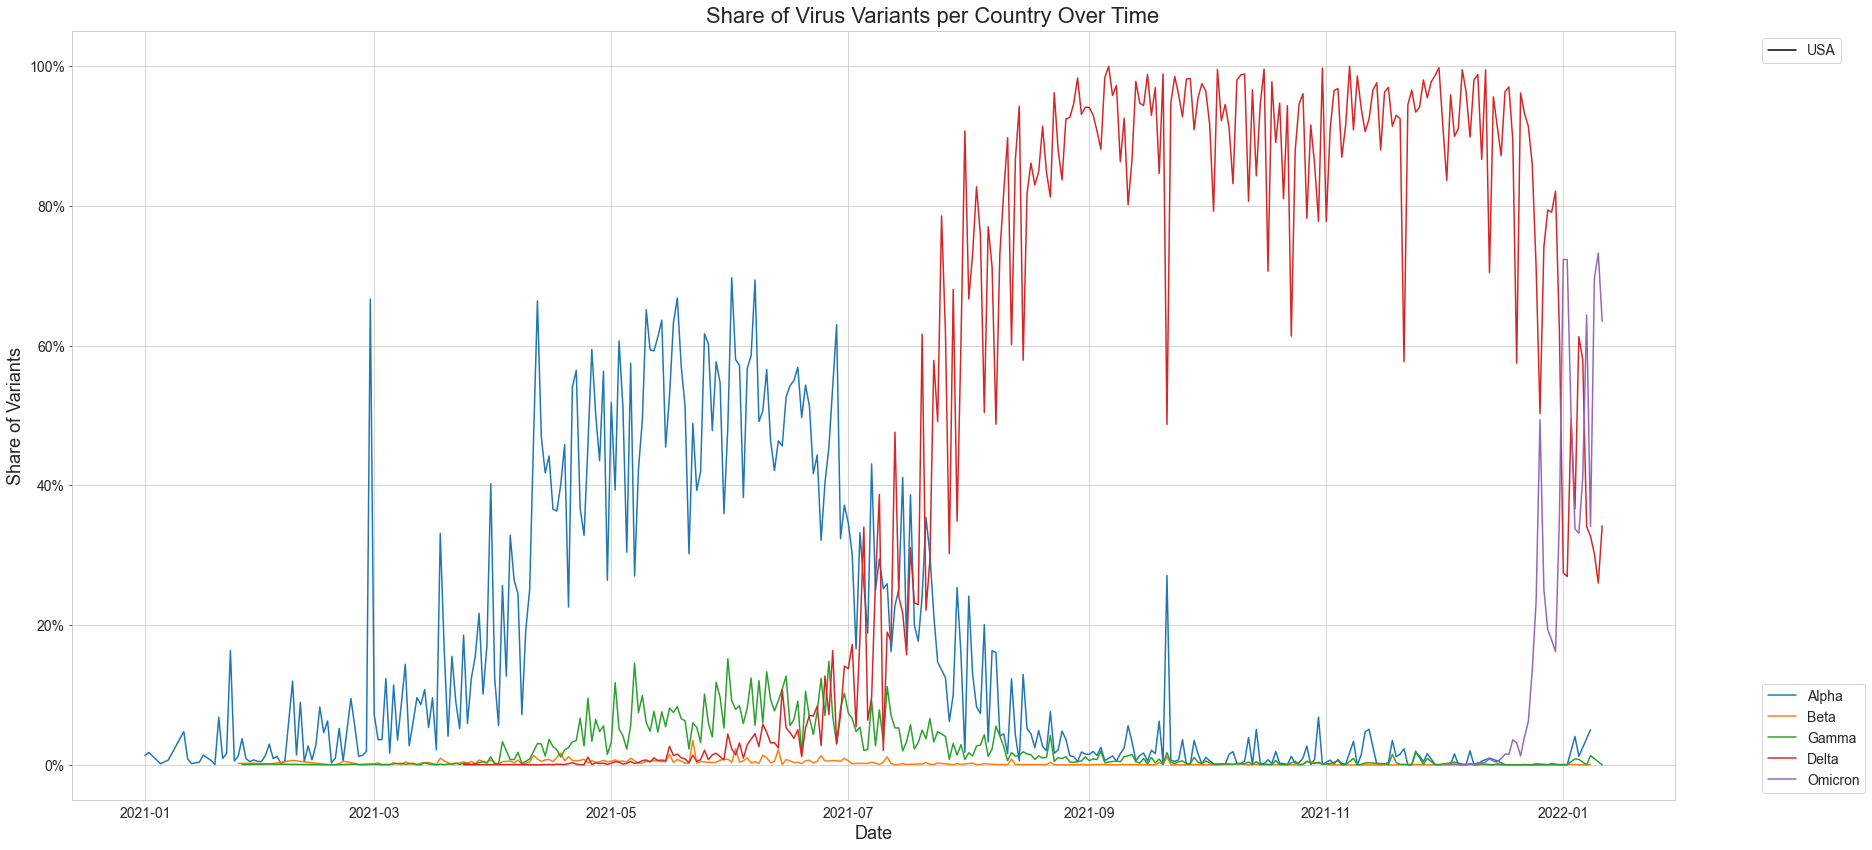

In [97]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import os
import seaborn as sns

# Adjust which countries and virus variants to include
COUNTRIES = ['USA']  # ['USA', 'United Kingdom', 'Germany', 'Denmark', 'Canada']
VARIANTS = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Omicron']

# Aggregate counts for each week or not
WEEKLY = False

# Adjust which timeframe to look at
# If defined via dataframe, make sure to use correct one depending on WEEKLY flag
# plotdata['covv_subm_date'] for original values and weekly_plotdata['startday_of_week'] for weekly sum of values
START_DATE = '2021-01-01'
END_DATE = plotdata['covv_subm_date'].max()

if WEEKLY:
    plotdata_reduced = weekly_plotdata[(weekly_plotdata['startday_of_week'] >= START_DATE) & (weekly_plotdata['startday_of_week'] <= END_DATE)]
else:
    plotdata_reduced = plotdata[(plotdata['covv_subm_date'] >= START_DATE) & (plotdata['covv_subm_date'] <= END_DATE)]

# Define colors for virus variants
COLORS = sns.color_palette('tab10')
if len(VARIANTS) > len(COLORS):
    raise ValueError(f'Please define at most {len(COLORS)} variants!')

# Define line styles for countries
STYLES = ['solid', 'dashed', 'dotted']
if len(COUNTRIES) > len(STYLES):
    raise ValueError(f'Please define at most {len(STYLES)} countries!')

# Generate line per country-variant combination showing daily #variants/#samples over time
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(26, 12))
for country_idx, country in enumerate(COUNTRIES):
    for variant_idx, variant in enumerate(VARIANTS):
        if WEEKLY:
            current_plotdata = plotdata_reduced[plotdata_reduced['country_variant'] == tuple([country, variant])]
            ax.plot(current_plotdata['startday_of_week'], current_plotdata['relative_sample_count'], ls=STYLES[country_idx], color=COLORS[variant_idx])

        else:
            current_plotdata = plotdata_reduced[(plotdata_reduced['country'] == country) & (plotdata_reduced['variant_WHO_label'] == variant)].sort_values('covv_subm_date')
            ax.plot(current_plotdata['covv_subm_date'], current_plotdata['relative_samples_per_variant'], ls=STYLES[country_idx], color=COLORS[variant_idx])

# Add legend for countries
for country_idx, country in enumerate(COUNTRIES):
    ax.plot(np.nan, np.nan, ls=STYLES[country_idx], label=country, color='black')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=14)  # upper legend

# Add legend for virus variants
ax2 = ax.twinx()
for variant_idx, variant in enumerate(VARIANTS):
    ax2.plot(np.nan, np.nan, color=COLORS[variant_idx], label=variant)
ax2.get_yaxis().set_visible(False)
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0), fontsize=14)  # lower legend

# Adjust text
fig.suptitle(f'{"Weekly " if WEEKLY else ""}Share of Virus Variants per Country Over Time', fontsize=22)
ax.set_xlabel(f'{"Start Date of Week" if WEEKLY else "Date"}', fontsize=18)
ax.set_ylabel('Share of Variants', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)

# Convert y-values ranging from 0 to 1 to percentages
yticks_percentages = mtick.PercentFormatter(xmax=1)
ax.yaxis.set_major_formatter(yticks_percentages)

# Create subdirectory if needed
if not os.path.isdir('../../plots/GISAID/variant_shares_over_time'):
    os.mkdir('../../plots/GISAID/variant_shares_over_time')

# Optimize layout and save plot
fig.tight_layout()
fig.savefig(f'../../plots/GISAID/variant_shares_over_time/variant_shares_over_time{"_weekly" if WEEKLY else ""}'
            f'#{"_".join(sorted(VARIANTS))}'
            f'#{"_".join(sorted(COUNTRIES))}'
            f'#{START_DATE if type(START_DATE) == str else str(START_DATE.date())}'
            f'#{END_DATE if type(END_DATE) == str else str(END_DATE.date())}.png', dpi=300)
plt.close()

# -> USA plot is meaningful: https://www.nytimes.com/interactive/2021/health/coronavirus-variant-tracker.html (see "Waves of Variants")

## Sequenced Percentage of Infections per Country Over Time

Per country, generate one time series plot showing which percentage of cases was sequenced (#samples / #infections) over time.

In [208]:
country_cumulative_infections = pd.read_csv('../../data/JHU_countries_time_series.csv')
country_cumulative_infections.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,2/9/22,2/10/22,2/11/22,2/12/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,164727,165358,165711,166191,166924,167739,168550,169448,169940,170152
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,261240,263172,263172,264624,264875,265716,266416,267020,267020,267551
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,255836,256806,257598,257976,258478,259088,259673,260191,260723,261226
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,36470,36599,36599,36599,36808,36808,36989,37074,37140,37140
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,98319,98340,98351,98364,98409,98424,98453,98474,98501,98514


In [209]:
# Get number of new infections from cumulative number of infections
# -> Can also be directly downloaded on https://github.com/owid/covid-19-data/blob/master/public/data/jhu/new_cases.csv
# -> This is the already converted version of the JHU data by OWID, so it has another format!
country_new_infections = country_cumulative_infections[['Country/Region']].copy()

for i, col in enumerate(country_cumulative_infections.columns[5:]):
    country_new_infections[col] = country_cumulative_infections[col] - country_cumulative_infections.iloc[:, i+4]

country_new_infections[country_new_infections['Country/Region'] == 'Germany']

c:\users\ninai\onedrive\dokumente\studium\module\master\4. semester\accountability in ai\sampling bias\sampling-bias-cov19\venv\lib\site-packages\ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


,Country/Region,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,2/9/22,2/10/22,2/11/22,2/12/22
135,Germany,0,0,0,0,1,3,0,0,1,...,248652,214386,127116,82363,51377,380632,252813,236080,206242,116810


In [210]:
countries_JHU = country_new_infections['Country/Region'].unique()
countries_GISAID = gisaid_metadata['country'].unique()

# Missing countries of GISAID metadata
list(set(countries_GISAID) - set(countries_JHU))

['Bonaire',
 'Gibraltar',
 'Wallis and Futuna Islands',
 'Cayman Islands',
 'Saint Martin',
 'Palestine',
 'Hong Kong',
 'Guam',
 'Guadeloupe',
 'Turks and Caicos Islands',
 'French Guiana',
 'U.S. Virgin Islands',
 'Martinique',
 'Puerto Rico',
 'Canary Islands',
 'American Samoa',
 'British Virgin Islands',
 'Crimea',
 'Saint Barthelemy',
 'Sint Eustatius',
 'USA',
 'The Bahamas',
 'Curacao',
 'Aruba',
 'Sint Maarten',
 'South Korea',
 'Reunion',
 'Czech Republic',
 'Montserrat',
 'Myanmar',
 'Anguilla',
 'Faroe Islands',
 'Mayotte',
 'Northern Mariana Islands',
 'Bermuda',
 'Taiwan',
 'French Polynesia',
 'Democratic Republic of the Congo']

In [211]:
# Missing countries of JHU metadata
list(set(countries_JHU) - set(countries_GISAID))

['Samoa',
 'Kiribati',
 'Korea, South',
 'Tajikistan',
 'San Marino',
 'US',
 'Congo (Kinshasa)',
 'Bhutan',
 'Eritrea',
 'Mauritania',
 'West Bank and Gaza',
 'Sao Tome and Principe',
 'Micronesia',
 'Tonga',
 'Bahamas',
 'Taiwan*',
 'Winter Olympics 2022',
 'Antarctica',
 'Diamond Princess',
 'Czechia',
 'Burma',
 'Yemen',
 'Summer Olympics 2020',
 'MS Zaandam',
 'Marshall Islands',
 'Congo (Brazzaville)',
 'Holy See']

In [212]:
# Rename countries to GISAID naming schema
country_new_infections['Country/Region'] = country_new_infections['Country/Region']\
    .replace(['Korea, South', 'West Bank and Gaza', 'US', 'Samoa', 'Congo (Kinshasa)', 'Congo (Brazzaville)', 'Bahamas'],
             ['South Korea', 'West Bank', 'USA', 'American Samoa', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'The Bahamas'])

In [213]:
# Get sample count per country and date
plotdata = gisaid_metadata.groupby(['country', 'covv_subm_date']).size().reset_index().rename(columns={0: 'count'})

# Reduce GISAID countries to countries known in infection data
plotdata = plotdata[plotdata['country'].isin(country_new_infections['Country/Region'].unique())]
plotdata

,country,covv_subm_date,count
0,Afghanistan,2021-02-15,7
1,Afghanistan,2021-02-19,6
2,Afghanistan,2021-02-22,3
3,Afghanistan,2021-09-29,83
4,Albania,2021-01-14,1
...,...,...,...
14647,Zimbabwe,2021-11-29,2
14648,Zimbabwe,2022-01-11,165
14649,Zimbabwe,2022-01-18,32
14650,Zimbabwe,2022-01-27,22


In [240]:
# Calculate which percentage of cases was sequenced
def scale_count(row):
    date_col = row['covv_subm_date'].strftime('%#m/%#d/%#y')

    if date_col in country_new_infections.columns:
        country_infections = country_new_infections[country_new_infections['Country/Region'] == row['country']]
        # Use sum() as some countries are listed several times in JHU data
        return row['count'] / country_infections[date_col].sum()

    else:
        return np.nan

plotdata['count_scaled'] = plotdata.apply(lambda row: scale_count(row), axis=1)
plotdata

c:\users\ninai\onedrive\dokumente\studium\module\master\4. semester\accountability in ai\sampling bias\sampling-bias-cov19\venv\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


,country,covv_subm_date,count,count_scaled
0,Afghanistan,2021-02-15,7,0.318182
1,Afghanistan,2021-02-19,6,0.333333
2,Afghanistan,2021-02-22,3,0.230769
3,Afghanistan,2021-09-29,83,2.371429
4,Albania,2021-01-14,1,0.001515
...,...,...,...,...
14647,Zimbabwe,2021-11-29,2,0.007273
14648,Zimbabwe,2022-01-11,165,inf
14649,Zimbabwe,2022-01-18,32,inf
14650,Zimbabwe,2022-01-27,22,0.143791


In [249]:
# Remove rows with scaled count of NaN, inf, > 1 or < 0
print(len(plotdata))
plotdata_clean = plotdata[(~plotdata['count_scaled'].isin([np.nan, np.inf, -np.inf])) & (plotdata['count_scaled'].between(0, 1))]
print(len(plotdata_clean))

13293
11618


In [241]:
import os

if not os.path.isdir('../../plots/GISAID/country_counts_by_infection'):
    os.mkdir('../../plots/GISAID/country_counts_by_infection')

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust countries
COUNTRIES = ['USA']  #plotdata['country'].unique()
CLEAN = True

if CLEAN:
    plotdata_reduced = plotdata_clean[plotdata_clean['country'].isin(COUNTRIES)]
else:
    plotdata_reduced = plotdata[plotdata['country'].isin(COUNTRIES)]

# Per country, create line with sample count scaled by number of infections
sns.set_style('whitegrid')

for country in COUNTRIES:
    fig, ax = plt.subplots(figsize=(32, 16))
    sns.lineplot(data=plotdata_reduced[plotdata_reduced['country'] == country],
                 x='covv_subm_date',
                 y='count_scaled')

    fig.suptitle(f'Number of Samples for {country}\n Scaled by Number of Infections\n', fontsize=22)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Scaled Sample Count', fontsize=18)
    plt.xticks(fontsize=14, rotation=90)
    plt.yticks(fontsize=14)

    plt.tight_layout()
    plt.savefig(f'../../plots/GISAID/country_counts_by_infection/country_counts_over_time_scaled_by_nr_infections'
                f'_{country}{"_clean" if CLEAN else ""}.png', dpi=300)
    plt.close()